## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
from pathlib import Path
drive.mount('/content/drive/')
path = Path('/content/drive/')

Mounted at /content/drive/


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.datasets import load_diabetes


df = pd.read_csv("/content/drive/MyDrive/Python/ДЗ - Статистика/bikeshare.csv")
#del df['datetime']
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

Text(0.5, 1.0, 'Распределение температуры')

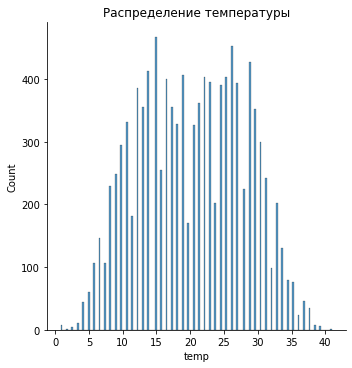

In [ ]:
sns.displot(df.temp, bins = 150)
plt.title("Распределение температуры")

Text(0.5, 1.0, 'Распределение влажности')

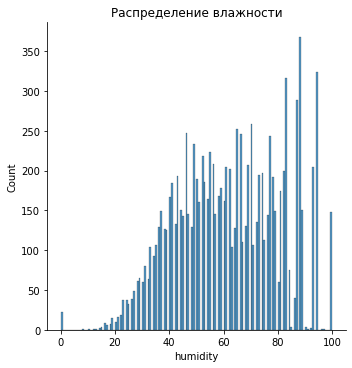

In [ ]:
sns.displot(df.humidity, bins = 150)
plt.title("Распределение влажности")

Text(0.5, 1.0, 'Распределение скорости ветра')

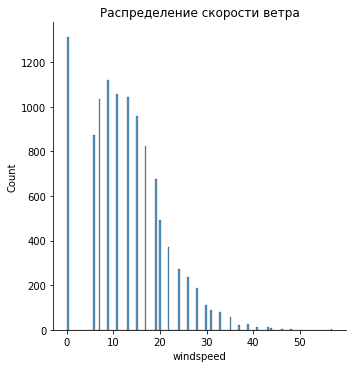

In [ ]:
sns.displot(df.windspeed, bins = 150)
plt.title("Распределение скорости ветра")

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [ ]:
#Среднее температуры:

df.temp.mean()

20.230859819952173

In [ ]:
#дисперсия температуры:
np.var(df.temp)

60.703295512775576

In [ ]:
# 50-ый перцентиль температуры:

np.percentile(df.temp, 50)

20.5

In [ ]:
# 75-ый перцентиль температуры:

np.percentile(df.temp, 75)

26.24

In [ ]:
# 99-ый перцентиль температуры:

np.percentile(df.temp, 99)

36.08

In [ ]:
# мода температуры:

df.temp.value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [ ]:
# Средняя влажность:

df.humidity.mean()

61.88645967297446

In [ ]:
#дисперсия влажности:
np.var(df.humidity)

370.337283130244

In [ ]:
# 50-ый перцентиль влажности:

np.percentile(df.humidity, 50)

62.0

In [ ]:
# 75-ый перцентиль влажности:

np.percentile(df.humidity, 75)

77.0

In [ ]:
# 99-ый перцентиль влажности:

np.percentile(df.humidity, 99)

100.0

In [ ]:
# мода влажности:

df.humidity.value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
13      1
10      1
12      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [ ]:
#Средняя скорость ветра:

df.windspeed.mean()

12.799395406945093

In [ ]:
# Средняя скорость ветра:

df.windspeed.mean()

12.799395406945093

In [ ]:
#дисперсия скорости ветра:
np.var(df.windspeed)

66.65354633034862

In [ ]:
# 50-ый перцентиль скорости ветра:

np.percentile(df.windspeed, 50)

12.998

In [ ]:
# 75-ый перцентиль скорости ветра:

np.percentile(df.windspeed, 75)

16.9979

In [ ]:
# 99-ый перцентиль скорости ветра:

np.percentile(df.windspeed, 99)

35.0008

In [ ]:
# мода скорости ветра:

df.windspeed.value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

**Вывод**: у температуры две моды. Видимо, они созданы наиболее частыми температурами днем и ночью.

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [ ]:
# Коэффициент ассиметрии температуры

df.temp.skew()

0.003690844422472008

In [ ]:
#Коэффициент эксцесса температуры

df.temp.kurtosis()

-0.9145302637630794

In [ ]:
# Коэффициент ассиметрии влажности
df.humidity.skew()

-0.08633518364548581

In [ ]:
#Коэффициент эксцесса влажности
df.humidity.kurtosis()

-0.7598175375208864

In [ ]:
# Коэффициент ассиметрии скорости ветра
df.windspeed.skew()

0.5887665265853944

In [ ]:
#Коэффициент эксцесса скорости ветра
df.windspeed.kurtosis()

0.6301328693364932

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [ ]:
#дисперсия температуры:
np.var(df.temp)

#дисперсия влажности:
np.var(df.humidity)

#дисперсия скорости ветра:
np.var(df.windspeed)

highest = max(np.var(df.temp), np.var(df.humidity), np.var(df.windspeed))
highest

370.337283130244

Text(0.5, 1.0, 'Дисперсия скорости ветра')

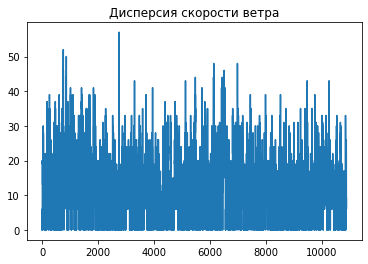

In [3]:
df.windspeed.plot()
plt.title("Дисперсия скорости ветра")

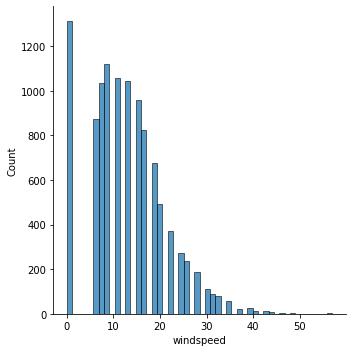

In [7]:
sns.displot(df.windspeed, bins = 50)

Text(0.5, 1.0, 'QQplot')

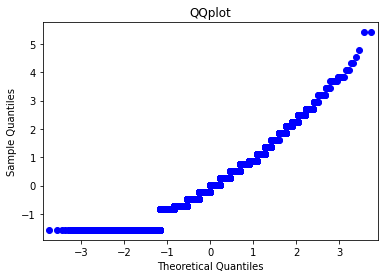

In [12]:
sm.qqplot(df.windspeed, fit = True)
plt.title('QQplot')

In [14]:
def my_norm_confidence(df=df, column = "windspeed", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale=df[column].std())
    return interval

In [15]:
# Считаем доверительный интервал:

confidence = my_norm_confidence()
print(confidence)

(-3.2028037040912753, 28.801594517981464)


Text(0.5, 1.0, 'Доверительный интервал')

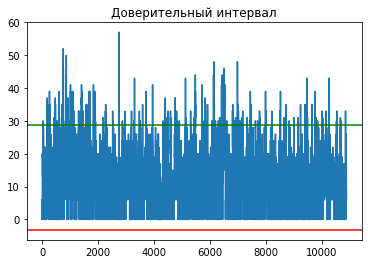

In [16]:
df.windspeed.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'доверительный интервал при доверительной вероятности 0,95')

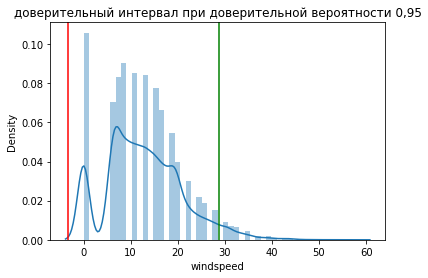

In [23]:
# Симметричный доверительный интервал:

sns.distplot(df.windspeed)
plt.axvline(x=confidence[1], color="g", linestyle="-")
plt.axvline(x=confidence[0], color="r", linestyle="-")
plt.title("доверительный интервал при доверительной вероятности 0,95")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [25]:
# оформим наши заготовки в функцию, оставив верхнюю границу от правил трех сигм и 99 квантиль

def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly,upper_level,level_99

In [27]:
anomaly_temp = find_anomaly(df=df, column = "temp")
len(anomaly_temp[0])/len(df)

0.010747749402902811

In [28]:
anomaly_humidity = find_anomaly(df=df, column = "humidity")
len(anomaly_humidity[0])/len(df)

0.013595443689142016

In [29]:
anomaly_windspeed = find_anomaly(df=df, column = "windspeed")
len(anomaly_windspeed[0])/len(df)

0.007348888480617307

Больше всего аномалий получилось для влажности.


### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

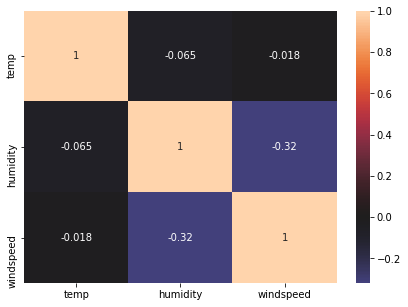

In [18]:
# Выбираем факторы для исследования взаимосвязей
research_list = ['temp', 'humidity','windspeed']
# Запишем корреляционную матрицу в отдельный датафрейм:
corr_m = df[research_list].corr()

# Визуализируем полученную корреляционную матрицу:

plt.figure(figsize = (7,5))
sns.heatmap(corr_m, center=0, annot = True)

Метрики не связаны между собой.